In [2]:
# Importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

df=pd.read_csv("heart_data.csv")
df.head(5)

,index,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [3]:
#Checking for any null values
print(df.isnull().sum())

index          0
id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64


In [4]:
#Converting age in days to age in yrs
df['age'] = np.floor(df['age'] / 365.25).astype(int)
#Creating BMI column using existing weight(Kg) and height(cm) column
df['BMI'] = df['weight'] / ((df['height']/100) ** 2)

df.head(5)

,index,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI
0,0,0,50,2,168,62.0,110,80,1,1,0,0,1,0,21.967120
1,1,1,55,1,156,85.0,140,90,3,1,0,0,1,1,34.927679
2,2,2,51,1,165,64.0,130,70,3,1,0,0,0,1,23.507805
3,3,3,48,2,169,82.0,150,100,1,1,0,0,1,1,28.710479
4,4,4,47,1,156,56.0,100,60,1,1,0,0,0,0,23.011177


In [5]:
#Checking for neg values in datasets
def check_neg(column_to_check):
  negative_count = (df[column_to_check] < 0).sum()
  print("Count of negative values in column '{}': {}".format(column_to_check, negative_count))

for col in df.columns:
  check_neg(col)

Count of negative values in column 'index': 0
Count of negative values in column 'id': 0
Count of negative values in column 'age': 0
Count of negative values in column 'gender': 0
Count of negative values in column 'height': 0
Count of negative values in column 'weight': 0
Count of negative values in column 'ap_hi': 7
Count of negative values in column 'ap_lo': 1
Count of negative values in column 'cholesterol': 0
Count of negative values in column 'gluc': 0
Count of negative values in column 'smoke': 0
Count of negative values in column 'alco': 0
Count of negative values in column 'active': 0
Count of negative values in column 'cardio': 0
Count of negative values in column 'BMI': 0


In [6]:
#sorting the df acc to age
df.sort_values(by='age', ascending=True, inplace=True)

#interpolate the negative ap_lo and ap_high with previous person who has similar age
df['ap_lo'] = df['ap_lo'].mask(df['ap_lo'] < 0, other=pd.NA)
df['ap_hi'] = df['ap_hi'].mask(df['ap_hi'] < 0, other=pd.NA)

df['ap_lo'] = df.groupby('age')['ap_lo'].transform(lambda x: x.interpolate(method='nearest'))
df['ap_hi'] = df.groupby('age')['ap_hi'].transform(lambda x: x.interpolate(method='nearest'))


for col in df.columns:
  check_neg(col)

Count of negative values in column 'index': 0
Count of negative values in column 'id': 0
Count of negative values in column 'age': 0
Count of negative values in column 'gender': 0
Count of negative values in column 'height': 0
Count of negative values in column 'weight': 0
Count of negative values in column 'ap_hi': 0
Count of negative values in column 'ap_lo': 0
Count of negative values in column 'cholesterol': 0
Count of negative values in column 'gluc': 0
Count of negative values in column 'smoke': 0
Count of negative values in column 'alco': 0
Count of negative values in column 'active': 0
Count of negative values in column 'cardio': 0
Count of negative values in column 'BMI': 0


In [7]:
#unique value
print(df.nunique())

index          70000
id             70000
age               28
gender             2
height           109
weight           287
ap_hi            148
ap_lo            156
cholesterol        3
gluc               3
smoke              2
alco               2
active             2
cardio             2
BMI             3808
dtype: int64


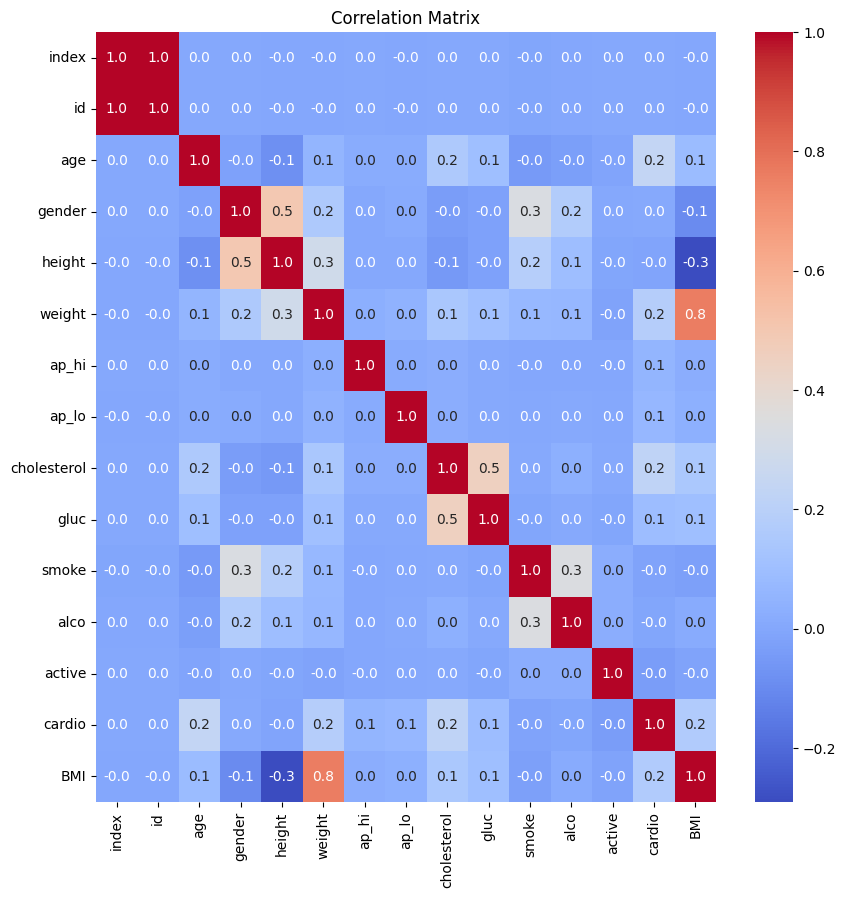

In [8]:
#Creating correlation matrix to measure statistical dependence of each feature.
correlation_matrix = df.corr()
plt.figure(figsize=(10, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".1f")
plt.title('Correlation Matrix')
plt.show()

In [9]:
print("old ap_hi max",df['ap_hi'].max())
print("old ap_hi min",df['ap_hi'].min())
print("old ap_lo max",df['ap_lo'].max())
print("old ap_lo min",df['ap_lo'].min())
df.drop(df[df['ap_hi'] > df['ap_hi'].quantile(0.5) + 10*(df.ap_hi.quantile(0.75)-df.ap_hi.quantile(0.25))].index,inplace = True)
df.drop(df[df['ap_lo'] > df['ap_lo'].quantile(0.5) + 10*(df.ap_lo.quantile(0.75)-df.ap_lo.quantile(0.25))].index,inplace = True)
print("new ap_hi max",df['ap_hi'].max())
print("new ap_hi min",df['ap_hi'].min())
print("new ap_lo max",df['ap_lo'].max())
print("new ap_lo min",df['ap_lo'].min())
print("new size",df.shape)

old ap_hi max 16020.0
old ap_hi min 1.0
old ap_lo max 11000.0
old ap_lo min 0.0
new ap_hi max 309.0
new ap_hi min 7.0
new ap_lo max 180.0
new ap_lo min 0.0
new size (69005, 15)


In [10]:
# Normal: - 0

# Systolic: Less than 120 mmHg
# Diastolic: Less than 80 mmHg
# (e.g., 115/75 mmHg)
# Elevated: - 1

# Systolic: 120-129 mmHg
# Diastolic: Less than 80 mmHg
# (e.g., 125/78 mmHg)
# Hypertension Stage 1: - 2

# Systolic: 130-139 mmHg
# Diastolic: 80-89 mmHg
# (e.g., 135/85 mmHg)
# Hypertension Stage 2: - 3

# Systolic: 140 mmHg or higher
# Diastolic: 90 mmHg or higher
# (e.g., 145/92 mmHg)
# Hypertensive Crisis: - 4

# Systolic: Higher than 180 mmHg
# Diastolic: Higher than 120 mmHg

#making another column for hypertension acc to the above data as hypertension is one of the major causes of heart diseases

def classify_blood_pressure(row):
    systolic = row['ap_hi']
    diastolic = row['ap_lo']

    if systolic < 120 and diastolic < 80:
        return 0
    elif 120 <= systolic <= 129 and diastolic < 80:
        return 1
    elif 130 <= systolic <= 139 or (80 <= diastolic <= 89):
        return 2
    elif 179 >= systolic >= 140 or 119 >= diastolic >= 90:
        return 3
    elif systolic > 180 or diastolic > 120:
        return 4

# adding hypertension column
df['Hypertension'] = df.apply(classify_blood_pressure, axis=1)
print(df.head(60))

       index     id  age  gender  height  weight  ap_hi  ap_lo  cholesterol  \
6219    6219   8850   29       1     175    59.0  120.0   80.0            1   
22343  22343  31922   29       2     175    92.0  100.0   60.0            1   
30666  30666  43842   29       1     159    59.0  120.0   80.0            1   
55905  55905  79749   30       1     160    59.0  110.0   70.0            1   
47373  47373  67661   39       1     168    61.0  100.0   80.0            1   
62801  62801  89674   39       2     182    62.0  130.0   60.0            1   
16802  16802  24010   39       1     155    54.0  120.0   80.0            1   
62781  62781  89645   39       2     168    70.0  120.0   80.0            1   
21482  21482  30691   39       2     167    72.0  110.0   70.0            1   
3669    3669   5190   39       2     170    77.0  120.0   80.0            1   
21480  21480  30688   39       2     168    73.0  110.0   70.0            1   
27789  27789  39737   39       1     164    67.0   9

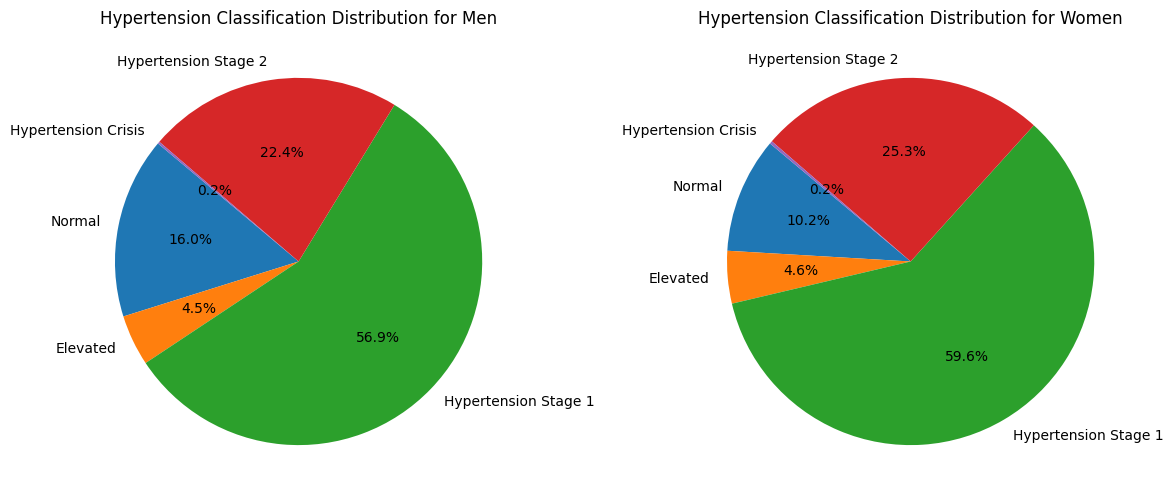

In [11]:
#drawing pie charts for knowing which gender is having more hypertension
hypertension_counts = df.groupby(['gender', 'Hypertension']).size().unstack()
plt.figure(figsize=(12, 6))

for i, gender in enumerate(hypertension_counts.index):
    gender_label = "Women" if gender == 2 else "Men"
    plt.subplot(1, 2, i + 1)
    plt.pie(hypertension_counts.loc[gender], labels= ['Normal','Elevated','Hypertension Stage 1','Hypertension Stage 2','Hypertension Crisis'], autopct='%1.1f%%', startangle=140)
    plt.title(f'Hypertension Classification Distribution for {gender_label}')

plt.tight_layout()
plt.show()